In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses

from keras.utils import np_utils
from keras.datasets import cifar10

import keras.backend as K

import random

In [ ]:
img_input = keras.Input(shape=(32,32,3))
aug_input = layers.GaussianNoise(stddev = 0.15)(img_input)

In [ ]:
x1 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(512,(3,3),padding="valid")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.GlobalAveragePooling2D()(x1)
output1 = layers.Dense(10, activation = "Softmax",name="z")(x1)
#output1_1 = layers.Dense(10, activation = "Softmax")(x1)

In [ ]:
x2 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(512,(3,3),padding="valid")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.GlobalAveragePooling2D()(x2)
x2 = layers.Dense(10, activation = "Softmax")(x2)

output2 = layers.subtract([x2,output1],name="z_hat")

In [ ]:
model = keras.Model(inputs=img_input, outputs = [output1, output2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 32, 32, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 128)  3584        ['gaussian_noise[0][0]']         
                                                                                                  
 conv2d_9 (Conv2D)              (None, 32, 32, 128)  3584        ['gaussian_noise[0][0]']         
                                                                                              

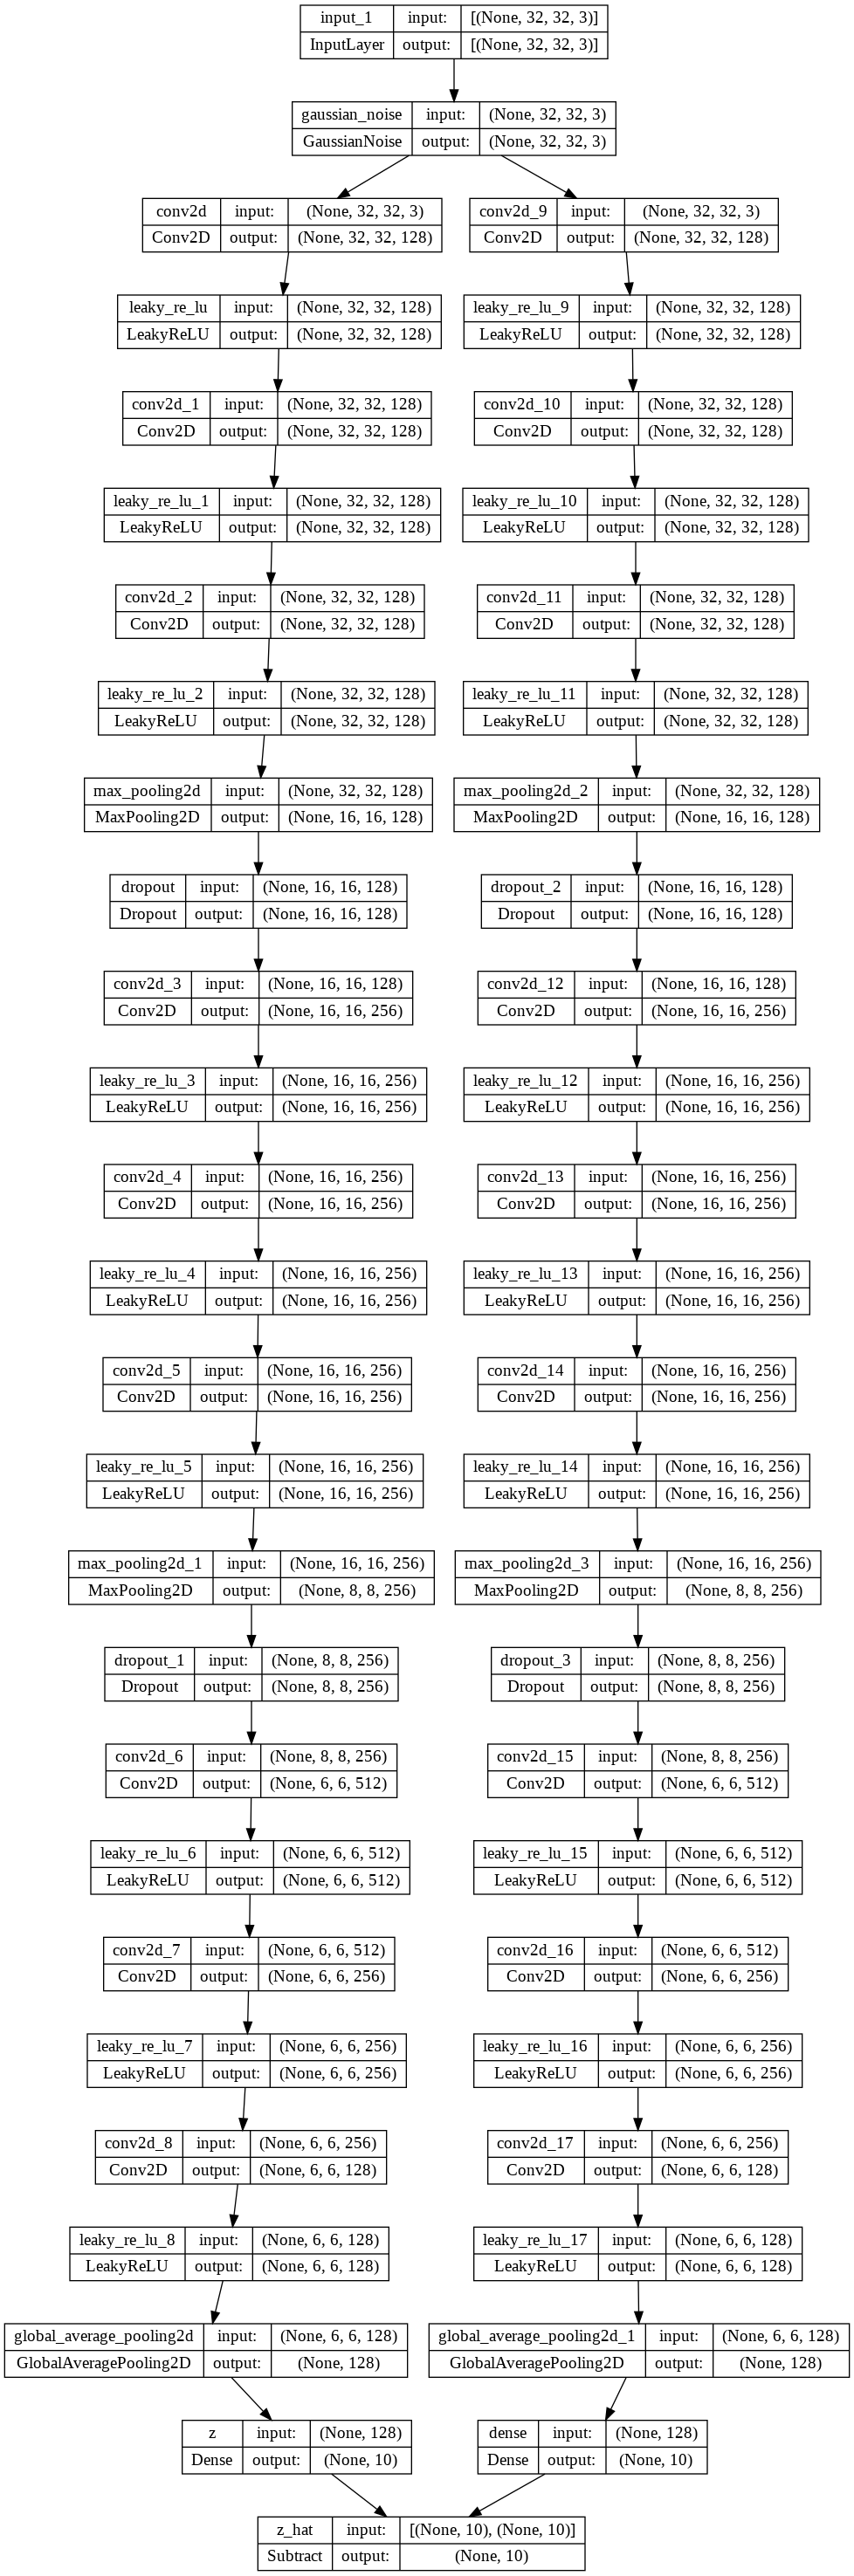

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
#def pi_model_loss(y_true,y_pred):
  #const = K.cast(K.not_equal(K.sum(y_true),0),"float32")
  #return (1 - const) * (-1) * K.dot( K.log(K.exp(y_pred) / K.sum(K.exp(y_pred) )), K.transpose(y_true) )


def pi_model_loss(y_true,y_pred):
  return (-1) * K.dot( K.log(K.exp(y_pred) / K.sum(K.exp(y_pred) )), K.transpose(y_true) )



In [ ]:
class Dynamic_loss_weights(tf.keras.callbacks.Callback):
  def __init__(self,w1,w2):
    self.w1 = w1
    self.w2 = w2
  def on_epoch_end(self,epoch,logs={}):
    K.set_value(self.w2, 1 - K.pow(0.001*epoch))

In [ ]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

idx_0 = random.sample(range(50000),45000)
idx_00 = random.sample(range(10000),9000)

y_train[idx_0] = [0,0,0,0,0,0,0,0,0,0]
y_test[idx_00] = [0,0,0,0,0,0,0,0,0,0]
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.003),
    loss = [pi_model_loss, keras.losses.mse],
    loss_weights = [1,0.001],
    metrics = ['accuracy']

)

history = model.fit(X_train, y_train, batch_size=300, epochs=3,callbacks=[Dynamic_loss_weights(1,0.001)])

test_scores = model.evaluate(X_test,y_test,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[4])

Epoch 1/3
  6/167 [>.............................] - ETA: 54s - loss: 0.7528 - z_loss: 0.7526 - z_hat_loss: 0.2088 - z_accuracy: 0.0094 - z_hat_accuracy: 0.0122

111/167 [==================>...........] - ETA: 19s - loss: 0.8070 - z_loss: 0.8068 - z_hat_loss: 0.2100 - z_accuracy: 0.0097 - z_hat_accuracy: 0.0100

In [ ]:
Dynamic_loss_weights(1,1-0.999)